In [1]:
import tensorflow as tf

In [2]:
( train_x , train_y) , (test_x , test_y) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 5s 0us/step


In [3]:
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-kkk571pl because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
plt.imshow(train_x[0],cmap=plt.cm.binary)

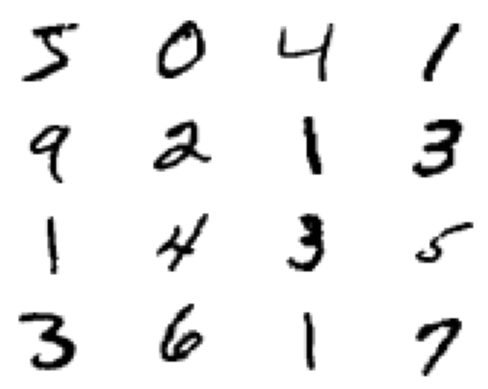

In [5]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis("off")
    plt.imshow(train_x[i] , cmap=plt.cm.binary)
plt.show()

In [6]:
train_x.shape


(60000, 28, 28)

In [7]:
real_samples = train_x[:30000]

In [8]:
real_samples.shape
real_samples = real_samples.reshape((-1 , 28 , 28 , 1))

In [9]:
real_samples.shape

(30000, 28, 28, 1)

In [10]:
import numpy as np

In [11]:
fake_samples = np.random.random((30000,28,28,1))

In [12]:
fake_samples.shape

(30000, 28, 28, 1)

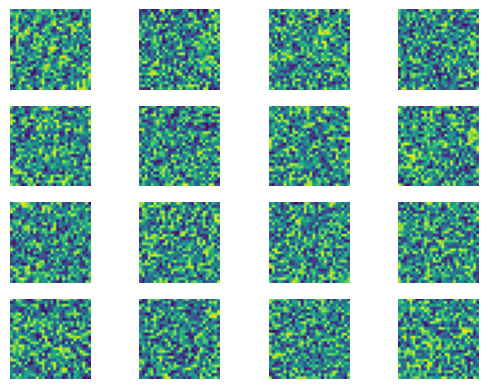

In [13]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(fake_samples[i])
plt.show()

In [14]:
real_samples_y = np.ones((30000))

In [15]:
real_samples_y.shape

(30000,)

In [16]:
real_samples_y[0]

1.0

In [17]:
fake_samples_y = np.zeros((30000))

In [18]:
fake_samples_y[0]

0.0

In [19]:
discriminator_y = np.hstack((real_samples_y , fake_samples_y))

In [20]:
discriminator_y.shape

(60000,)

In [21]:
discriminator_x = np.vstack((real_samples , fake_samples))

In [22]:
discriminator_x.shape

(60000, 28, 28, 1)

In [23]:
discriminator = tf.keras.Sequential()

In [24]:
discriminator.add(tf.keras.layers.Conv2D(filters=64 , padding='same' , input_shape=(28 , 28 , 1) , kernel_size=(3,3), strides=(2,2)))

In [25]:
discriminator.add(tf.keras.layers.LeakyReLU(alpha=0.2))

In [26]:
discriminator.add(tf.keras.layers.Dropout(0.4))

In [27]:
discriminator.add(tf.keras.layers.Conv2D(filters=32 , strides=(2,2) , kernel_size=(3,3)))

In [28]:
discriminator.add(tf.keras.layers.LeakyReLU(alpha=0.2))

In [29]:
discriminator.add(tf.keras.layers.Dropout(0.4))

In [30]:
discriminator.add(tf.keras.layers.Flatten())

In [31]:
discriminator.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

In [32]:
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          18464     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6, 6, 32)          0         
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [33]:
discriminator.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['acc'])

In [34]:
discriminator.fit(discriminator_x , discriminator_y , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 41s 2ms/step - loss: 0.0238 - acc: 0.9889
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3496e-04 - acc: 1.0000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.4147e-06 - acc: 1.0000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.8609e-07 - acc: 1.0000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8854e-07 - acc: 1.0000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 6.7403e-08 - acc: 1.0000
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3047e-08 - acc: 1.0000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 8.3741e-09 - acc: 1.0000
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.3008e-09 - acc: 1.0000
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1220e-09 - acc:

In [35]:
generator = tf.keras.Sequential()

In [36]:
generator.add(tf.keras.layers.Dense(128*7*7 , input_dim=100 ))

In [37]:
generator.add(tf.keras.layers.LeakyReLU(alpha=0.2))

In [38]:
generator.add(tf.keras.layers.Reshape((7 , 7 , 128)))

In [39]:
generator.add(tf.keras.layers.Conv2DTranspose(128 , (4 ,4) , strides=(2,2) , padding='same'))

In [40]:
generator.add(tf.keras.layers.LeakyReLU(alpha=0.2))

In [41]:
generator.add(tf.keras.layers.Conv2DTranspose(128 , (4 ,4 ) , strides=(2,2) , padding='same'))

In [42]:
generator.add(tf.keras.layers.LeakyReLU(alpha=0.2))

In [43]:
generator.add(tf.keras.layers.Conv2D(1 , (7 ,7) , padding='same' , activation='sigmoid'))

In [44]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 128)      262272    
 ranspose)                                            

In [45]:
final_model = tf.keras.Sequential()

In [46]:
discriminator.trainable = False

In [47]:
final_model.add(generator)
final_model.add(discriminator)

In [48]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         1164289   
                                                                 
 sequential (Sequential)     (None, 1)                 20257     
                                                                 
Total params: 1,184,546
Trainable params: 1,164,289
Non-trainable params: 20,257
_________________________________________________________________


In [49]:
final_x = np.random.random((60000,100))

In [50]:
final_x.shape

(60000, 100)

In [51]:
final_y = np.ones((60000))

In [52]:
final_y.shape

(60000,)

In [53]:
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5),loss='binary_crossentropy',metrics=['acc'])

In [54]:
final_model.fit(final_x , final_y , epochs =100 , batch_size=25)

Epoch 1/100
2400/2400 [==============================] - 31s 13ms/step - loss: 15.9935 - acc: 0.0000e+00
Epoch 2/100
2400/2400 [==============================] - 31s 13ms/step - loss: 15.9646 - acc: 0.0000e+00
Epoch 3/100
 464/2400 [====>.........................] - ETA: 25s - loss: 15.9662 - acc: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
random_test = np.random.random((16,100))

In [ ]:
random_test.shape

In [ ]:
predictions = final_model.layers[0].predict(random_test)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(predictions[i] , cmap=plt.cm.binary)
plt.show()

In [55]:
import sklearn , pandas

In [57]:
import numpy as np

In [56]:
import seaborn